In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 67.0 MB/s 
     |████████████████████████████████| 895 kB 70.4 MB/s 
     |████████████████████████████████| 77 kB 6.5 MB/s 
     |████████████████████████████████| 6.6 MB 67.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import transformers

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# dir(transformers)

In [ ]:
train_data = pd.read_csv('train.csv',usecols=['id','text','target'])
test_data = pd.read_csv('test.csv',usecols=['id','text'])

In [ ]:
train_data.shape

(7613, 3)

In [ ]:
test_data.shape

(3263, 2)

In [ ]:
train_data.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_data.iloc[:,1:].head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
from transformers import TransfoXLTokenizer, TransfoXLForSequenceClassification
import torch

In [ ]:
tokenizer = TransfoXLTokenizer.from_pretrained('transfo-xl-wt103', max_length=128, pad_to_max_length=True,)

Downloading:   0%|          | 0.00/8.72M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.72M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/856 [00:00<?, ?B/s]

In [ ]:
model = TransfoXLForSequenceClassification.from_pretrained('transfo-xl-wt103')

Downloading:   0%|          | 0.00/1.06G [00:00<?, ?B/s]

Some weights of the model checkpoint at transfo-xl-wt103 were not used when initializing TransfoXLForSequenceClassification: ['crit.out_projs.0', 'crit.out_projs.2', 'crit.out_layers.3.weight', 'crit.cluster_bias', 'crit.out_layers.0.weight', 'crit.out_projs.1', 'crit.out_layers.1.weight', 'crit.out_projs.3', 'crit.out_layers.2.bias', 'crit.out_layers.3.bias', 'crit.out_layers.0.bias', 'crit.cluster_weight', 'crit.out_layers.2.weight', 'crit.out_layers.1.bias']
- This IS expected if you are initializing TransfoXLForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TransfoXLForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TransfoXLForSeq

In [ ]:
inputs = tokenizer(train_data['text'][0], return_tensors='pt')

In [ ]:
inputs

{'input_ids': tensor([[ 4609, 45802,    37,     1, 18360,     4,    56,  2146,  4802,   184,
            24, 58455,  1457,    73]])}

In [ ]:
labels = torch.tensor([1]).unsqueeze(0)

In [ ]:
outputs = model(**inputs, labels=labels)

In [ ]:
outputs.loss

tensor(0.6990, grad_fn=<NllLossBackward0>)

In [ ]:
outputs.logits

tensor([[0.1262, 0.1144]], grad_fn=<IndexBackward0>)

In [ ]:
outputs.mems[0]

tensor([[[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        ...,

        [[  3.5232,  -3.2505, -10.7664,  ...,   1.9910,  -7.1527,  -7.0651]],

        [[ -9.4280,  12.4786,  25.4723,  ...,  -7.8715, -22.9346,  -9.2522]],

        [[  9.2712,  -2.9120,  19.9007,  ..., -20.0381,   3.2039, -22.2151]]])

In [ ]:
x=train_data.iloc[:,1]; x.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [ ]:
y=train_data.iloc[:,2]; y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
len=len(x)

In [ ]:
from tqdm import tqdm_notebook as tqdm
losses=[model(**tokenizer(x[i],return_tensors='pt'),
              labels=torch.tensor(y[i]).unsqueeze(0))['loss'].item() for i in tqdm(range(len))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/7613 [00:00<?, ?it/s]

In [ ]:
np.mean(losses)

0.6933620709886255

In [ ]:
logits=[model(**tokenizer(x[i],return_tensors='pt'),
              labels=torch.tensor(y[i]).unsqueeze(0))['logits'].detach().numpy() for i in tqdm(range(len))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/7613 [00:00<?, ?it/s]

In [ ]:
y_true=y

In [ ]:
y_pred=[]
for i in logits:
  a=((np.exp(i[0])/np.sum(np.exp(i[0]))))
  if a[0]>0.5:
    y=1
  else:
    y=0
  y_pred.append(y)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55      4342
           1       0.42      0.44      0.43      3271

    accuracy                           0.50      7613
   macro avg       0.49      0.49      0.49      7613
weighted avg       0.50      0.50      0.50      7613



<Figure size 1080x1080 with 0 Axes>

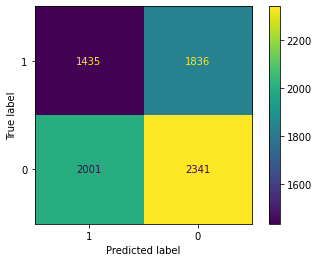

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=y_true.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=y_true.unique())
plt.figure(figsize=(15,15))
disp.plot()
plt.show()